In [ ]:
# https://www.kaggle.com/datasets/domhenjes/ballsemtpytt

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d domhenjes/ballsemtpytt

Dataset URL: https://www.kaggle.com/datasets/domhenjes/ballsemtpytt
License(s): CC-BY-NC-SA-4.0
 91% 178M/195M [00:00<00:00, 270MB/s]
100% 195M/195M [00:00<00:00, 253MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/ballsemtpytt.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [ ]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 823 files belonging to 2 classes.
Found 80 files belonging to 2 classes.


In [ ]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
26/26 [==============================] - 15s 219ms/step - loss: 0.7521 - accuracy: 0.5298 - val_loss: 0.6629 - val_accuracy: 0.7250
Epoch 2/10
26/26 [==============================] - 3s 102ms/step - loss: 0.6634 - accuracy: 0.6367 - val_loss: 0.6546 - val_accuracy: 0.5500
Epoch 3/10
26/26 [==============================] - 3s 98ms/step - loss: 0.5923 - accuracy: 0.6853 - val_loss: 0.5523 - val_accuracy: 0.7250
Epoch 4/10
26/26 [==============================] - 5s 158ms/step - loss: 0.4966 - accuracy: 0.7776 - val_loss: 0.5087 - val_accuracy: 0.7875
Epoch 5/10
26/26 [==============================] - 3s 94ms/step - loss: 0.3871 - accuracy: 0.8384 - val_loss: 0.5382 - val_accuracy: 0.7500
Epoch 6/10
26/26 [==============================] - 3s 98ms/step - loss: 0.3203 - accuracy: 0.8615 - val_loss: 0.7108 - val_accuracy: 0.6250
Epoch 7/10
26/26 [==============================] - 4s 117ms/step - loss: 0.2428 - accuracy: 0.9040 - val_loss: 0.7545 - val_accuracy: 0.7875
Epoch 8/

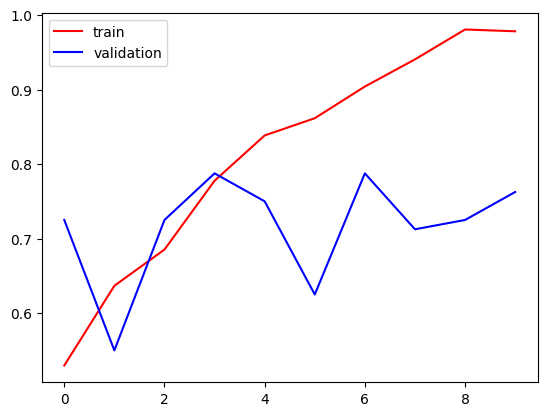

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

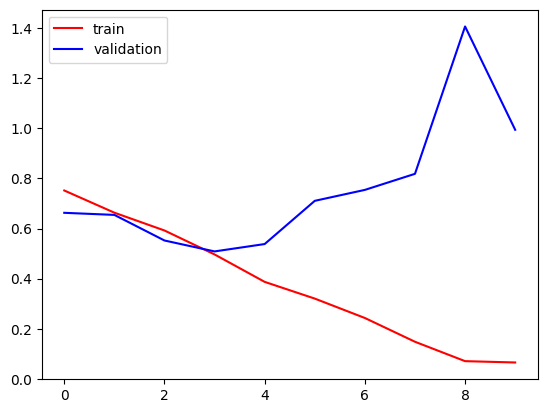

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
import cv2

In [ ]:
test_img = cv2.imread('/content/ball0.jpg')

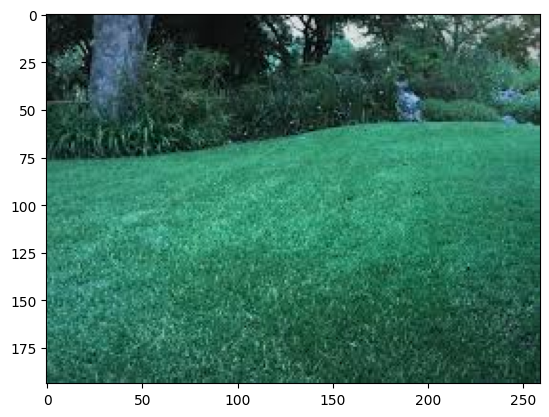

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(194, 259, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 0s 26ms/step


array([[0.]], dtype=float32)